# GoBike
## by Mohamed Abd El Motaal Mohamed 

## Preliminary Wrangling

> In this file of JupytherNotebook a dataset containing data Gobike information collected from a bike renting company is explored. The dataset has a number of 183412 observations and 16 features, including information about the durations of rides, stations at which the rides is started and likewise the stations at which the rides end. In addition to data about the rideres and useres such as birthdate gender and type if subscriber or customer.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar
import math
import time
from datetime import datetime
import calendar
%matplotlib inline

In [2]:
# Import Ford GoBike csv file into jupyter notebook
gobike = pd.read_csv('C:\\Users\\Motaal\\Desktop\\PYTHON\\201902-fordgobike-tripdata.csv',encoding= 'cp1252')

In [3]:
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
#remove all rows containing data that are missed.
gobike=gobike.dropna()

In [5]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

In [6]:
# The time variables in this dataset are all of string type.
gobike['start_time']= pd.to_datetime(gobike.start_time)
gobike['end_time']  = pd.to_datetime(gobike.end_time)
# calculating age
gobike['age'] = gobike['member_birth_year'].apply(lambda x: int(2021 - x))
# converting age into integer
gobike['age']=gobike['age'].astype(int)
# convert all ids into intgers
gobike['start_station_id']=gobike['start_station_id'].astype(int)
gobike['end_station_id']=gobike['end_station_id'].astype(int)
gobike['bike_id']=gobike['bike_id'].astype(int)


In [7]:
# Which day of the week has the ride been recorded on the start of the ride?
# First create a map of abbreiviations
dmap = {0:'Sat',1:'Sun', 2:'Mon',3:'Tue',4:'Wed',5:'Thu',6:'Fri'}
gobike['start_day_num'] = gobike['start_time'].apply(lambda time: time.dayofweek)
gobike['start_weekday_char'] = gobike['start_day_num'].map(dmap)


#  Which day of the week has the ride been recorded at the end of the ride?
# First create a map of abbreiviations
dmap = {0:'Sat',1:'Sun', 2:'Mon',3:'Tue',4:'Wed',5:'Thu',6:'Fri'}
gobike['end_day_num'] = gobike['end_time'].apply(lambda time: time.dayofweek)
gobike['end_weekday_char'] = gobike['end_day_num'].map(dmap)

In [8]:
gobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_day_num,start_weekday_char,end_day_num,end_weekday_char
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13,Commercial St at Montgomery St,37.794231,...,4902,Customer,1984.0,Male,No,37,3,Tue,4,Wed
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86,Market St at Dolores St,37.769305,-122.426826,3,Powell St BART Station (Market St at 4th St),37.786375,...,5905,Customer,1972.0,Male,No,49,3,Tue,4,Wed
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375,Grove St at Masonic Ave,37.774836,-122.446546,70,Central Ave at Fell St,37.773311,...,6638,Subscriber,1989.0,Other,No,32,3,Tue,4,Wed
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7,Frank H Ogawa Plaza,37.804562,-122.271738,222,10th Ave at E 15th St,37.792714,...,4898,Subscriber,1974.0,Male,Yes,47,3,Tue,4,Wed
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93,4th St at Mission Bay Blvd S,37.770407,-122.391198,323,Broadway at Kearny,37.798014,...,5200,Subscriber,1959.0,Male,No,62,3,Tue,4,Wed


In [9]:
gobike['start_weekday_char'][:]

0         Tue
2         Tue
3         Tue
4         Tue
5         Tue
         ... 
183407    Wed
183408    Wed
183409    Wed
183410    Wed
183411    Wed
Name: start_weekday_char, Length: 174952, dtype: object

In [10]:
# which month of the year
gobike['started_at_month_num']   = gobike['start_time'].apply(lambda time: time.month)
gobike['startted_month_letters'] = gobike['started_at_month_num'].apply(lambda x: calendar.month_abbr[x])
gobike['startted_month_letters'][:]

0         Feb
2         Feb
3         Feb
4         Feb
5         Feb
         ... 
183407    Feb
183408    Feb
183409    Feb
183410    Feb
183411    Feb
Name: startted_month_letters, Length: 174952, dtype: object

It seems as if all records are tken in the same month (Feb).

In [11]:
gobike['startted_month_letters'].value_counts(normalize=True)

Feb    1.0
Name: startted_month_letters, dtype: float64

In [12]:
# which interval of the day
gobike['start_hr'] = gobike['start_time'].apply(lambda time: time.hour)
gobike['start_time_day'] = 'morning'
gobike['start_time_day'][(gobike['start_hr'] >= 12) & (gobike['start_hr'] <= 17)] = 'afternoon'
gobike['start_time_day'][(gobike['start_hr'] >= 18) & (gobike['start_hr'] <= 23)] = 'night'


# which interval of the day
gobike['end_hr'] = gobike['end_time'].apply(lambda time: time.hour)
gobike['end_time_day'] = 'morning'
gobike['end_time_day'][(gobike['end_hr'] >= 12) & (gobike['end_hr'] <= 17)] = 'afternoon'
gobike['end_time_day'][(gobike['end_hr'] >= 18) & (gobike['end_hr'] <= 23)] = 'night'

<ipython-input-12-5c837669a57b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gobike['start_time_day'][(gobike['start_hr'] >= 12) & (gobike['start_hr'] <= 17)] = 'afternoon'
<ipython-input-12-5c837669a57b>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gobike['start_time_day'][(gobike['start_hr'] >= 18) & (gobike['start_hr'] <= 23)] = 'night'
<ipython-input-12-5c837669a57b>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gobike[

Do some datacleaning to other featurs

In [13]:
gobike['age']=gobike['age'].astype(int)
gobike['start_station_id']=gobike['start_station_id'].astype(int)
gobike['end_station_id']=gobike['end_station_id'].astype(int)
gobike['duration_min']=gobike['duration_sec']/60
gobike['bike_id']=gobike['bike_id'].astype(int)

In [14]:
gobike.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  int32         
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  int32         
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  int32         
 12  user_type       

In [15]:
gobike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age,start_day_num,end_day_num,started_at_month_num,start_hr,end_hr,duration_min
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.0,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,36.196865,2.619953,2.620090,2.0,13.456165,13.609533,11.733379
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,10.118731,1.808470,1.808667,0.0,4.734282,4.748029,27.370082
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,20.000000,0.000000,0.000000,2.0,0.000000,0.000000,1.016667
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,29.000000,1.000000,1.000000,2.0,9.000000,9.000000,5.383333
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,34.000000,3.000000,3.000000,2.0,14.000000,14.000000,8.500000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,41.000000,4.000000,4.000000,2.0,17.000000,18.000000,13.150000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,143.000000,6.000000,6.000000,2.0,23.000000,23.000000,1409.133333


### What is the structure of your dataset?

> This dataset describes a number of 174952 trips with 16 variables. These vriables are as givin in the list of columns with brief data describtion above.

### What is/are the main feature(s) of interest in your dataset?


Dataset is including information about the durations of rides, stations at which the rides is started and likewise the stations at which the rides end. In addition to data about the rideres and useres such as birthdate gender and type if subscriber or customer.



### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- To answer this question, important dates and time of trips,start_time and end_time are the most important data items.
 
- Secon, I am intersted about the average duration for trips the "duration_sec" column is the one we are interest in the most.
 
- Also, the type of user in column "user_type" is important to answer the third question about if the rider is a customer or sub scriber.


## Univariate Exploration


As a start, 'duration_sec' has an outlier values. this can be seen from min values and maxvalues passing through median and mean and finally standard deviation. this can be investigated as univirate at the first stage. Age seems also to has outliers since it's max value 143 it very possible tobe misstyped or false intry data that we should allso drop.

Text(0.5, 1.0, 'duration after enhancements')

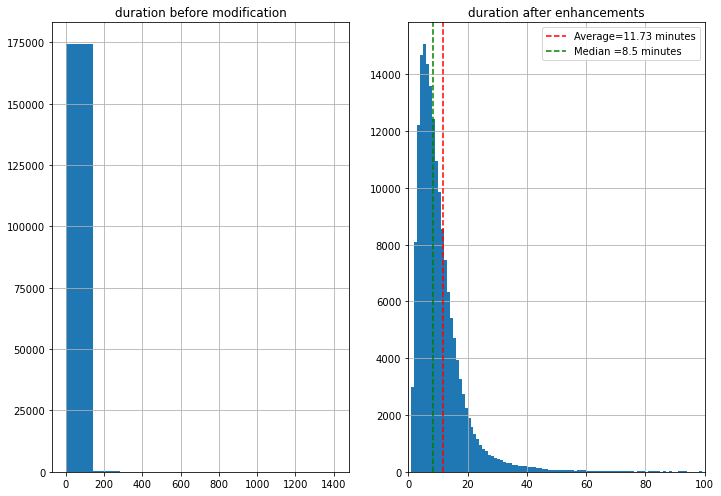

In [16]:
plt.figure(figsize=[ 11.69, 8.27])
plt.figure(1)
bins=range(0,100,1)
ax1=plt.subplot(1,2,1)
plt.hist(data = gobike, x = 'duration_min');

avglabl='Average={} minutes'.format(np.round(gobike['duration_min'].mean(),2))
medlabl='Median ={} minutes'.format(np.round(gobike['duration_min'].median(),2))

ax2=plt.subplot(1,2,2)
plt.hist(data = gobike, x = 'duration_min',bins=bins);####
# draw red dashed line to represent average
plt.axvline( gobike['duration_min'].mean(),color='r',linestyle='--', label= avglabl);
# draw green dashed line to represent the median
plt.axvline( gobike['duration_min'].quantile(q=.5),color='g',linestyle='--', label= medlabl);
plt.xlim(0,100);
# a limit was set to the x values in addition to modifying the bins to capture a readable figure
ax1.grid();
ax2.grid();
ax2.legend()
ax1.set_title('duration before modification')
ax2.set_title('duration after enhancements')

> The first and second figure show how that the median which is 50% of the observations lie below, is approximately 8.5 minutes. This dissipates the importance of other values that extends in arange up to 600 miutes. This shows also how that large portion of the bike rideres are taking their bikes for short durations (less than 10 minutes) as will be discussed later on. 

In [17]:
gobike[gobike['age'] == gobike.age.max()]


,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_weekday_char,end_day_num,end_weekday_char,started_at_month_num,startted_month_letters,start_hr,start_time_day,end_hr,end_time_day,duration_min
27370,1474,2019-02-25 09:28:42.161,2019-02-25 09:53:17.068,15,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,386,24th St at Bartlett St,37.752105,...,Sat,0,Sat,2,Feb,9,morning,9,morning,24.566667


In [18]:
gobike.age.max()

143

In [19]:
# exlude records with data that are unlogic such as durations that are greater than 10 hrs
# and users that are greater or equal to 60 years old.
gobike.drop(gobike[(gobike['duration_sec']>(60*60*10)) | (gobike['age']> 60)].index, inplace = True)

Text(0.5, 1.0, 'Age')

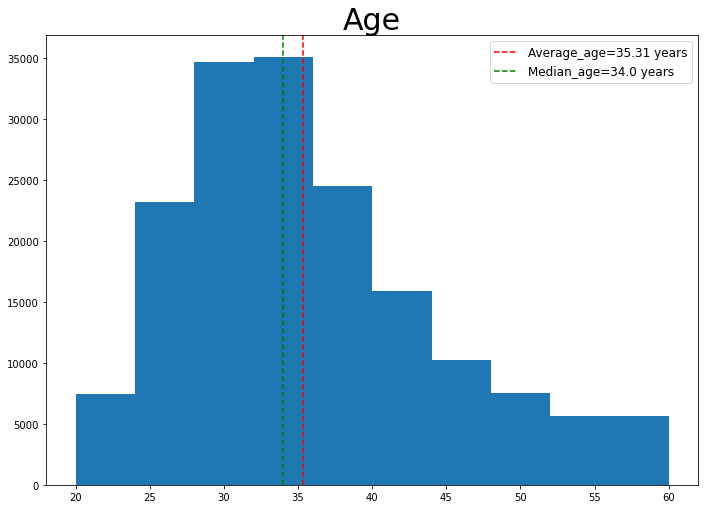

In [20]:
plt.figure(figsize=[ 11.69, 8.27])

plt.hist(data = gobike, x = 'age');
# draw red dashed line to represent average
avg_age_labl='Average_age={} years'.format(np.round(gobike['age'].mean(),2))
med_age_labl='Median_age={} years'.format(np.round(gobike['age'].median(),2))
plt.axvline( gobike['age'].mean(),color='r',linestyle='--', label = avg_age_labl);
# draw green dashed line to represent the median
plt.axvline( gobike['age'].quantile(q=.5),color='g',linestyle='--',label = med_age_labl);
plt.legend(fontsize=12);
plt.title('Age', fontsize=30)

> Next, to have a look at other single variable which is gender type:

C:\Users\Motaal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


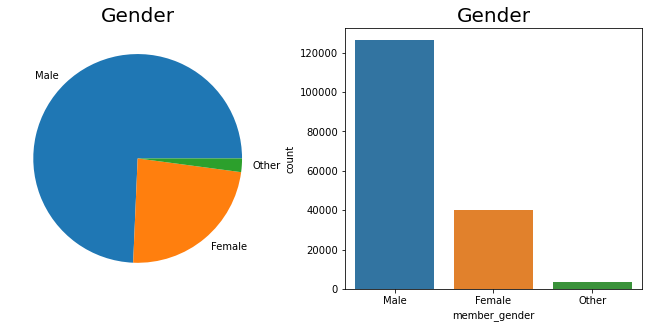

In [21]:
#  create a figure and set its size
plt.figure(figsize=[11.69,4.8])
# create a subplotting matrix
ax1=plt.subplot(1,2,1)
# plot the pie plot first 
plt.pie(gobike.member_gender.value_counts(), labels = gobike.member_gender.unique() );
# create the second axes
ax2=plt.subplot(1,2,2)
# plot using the countplot function
sb.countplot('member_gender', data = gobike );
ax1.set_title('Gender',fontsize=20);
ax2.set_title('Gender',fontsize=20);

The vast ,majority of the useres are males. while the minority is for the other gender type. Similar look at the user type will be next:

C:\Users\Motaal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'User Type')

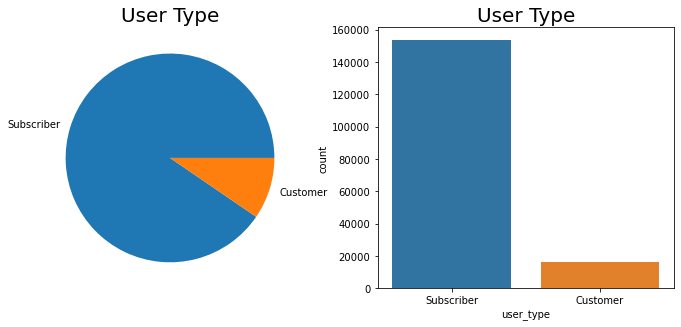

In [22]:
# add figure and set its size
plt.figure(figsize=[11.69,4.8])
# create subplot matrix
ax1=plt.subplot(1,2,1)
# plot the pie 
plt.pie(gobike.user_type.value_counts(), labels = gobike.user_type.unique() );
# set the second axes
ax2=plt.subplot(1,2,2)
# plot the countplot
sb.countplot('user_type', data = gobike);
ax1.set_title('User Type',fontsize=20)
ax2.set_title('User Type',fontsize=20)

Vast majority of useres are subscribers while custoimers are much lesser (approximately 1/7th of the useres).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Since data are well cleaned distributions are readable and no need for transformation is found.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Some data after modification is re-added to the dataset in form of cured features such as age, including and breakingdown the start and end time into months, weeks and day time intervals. 

## Bivariate Exploration


Next every station wil be represented as a point with x_coordinate (how many rides started from it) and y_coordinate(how many times rideres ended to the same station). In this manner we can deduce how that there are some stations are of higher occupation level and others are lesser in occupation. This can help in determining how many bikes should be provided for each station to sufficiently satisfy the demand.

Check if the the start stations are the same of the end stations.

In [23]:
gobike['start_station_id'].nunique()  ==  gobike['start_station_name'].nunique()
gobike['end_station_id'].nunique()    ==  gobike['end_station_name'].nunique()

True

In [24]:
# sort the station id column
gobike.sort_values(by=['start_station_id'],axis=0, ascending=[True])

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,start_weekday_char,end_day_num,end_weekday_char,started_at_month_num,startted_month_letters,start_hr,start_time_day,end_hr,end_time_day,duration_min
84461,5505,2019-02-17 16:12:44.729,2019-02-17 17:44:30.019,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,3,Powell St BART Station (Market St at 4th St),37.786375,...,Fri,6,Fri,2,Feb,16,afternoon,17,afternoon,91.750000
84028,546,2019-02-17 19:09:19.499,2019-02-17 19:18:25.697,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,58,Market St at 10th St,37.776619,...,Fri,6,Fri,2,Feb,19,night,19,night,9.100000
19348,305,2019-02-26 17:10:43.191,2019-02-26 17:15:48.412,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,47,4th St at Harrison St,37.780955,...,Sun,1,Sun,2,Feb,17,afternoon,17,afternoon,5.083333
84029,500,2019-02-17 19:10:02.713,2019-02-17 19:18:23.155,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,58,Market St at 10th St,37.776619,...,Fri,6,Fri,2,Feb,19,night,19,night,8.333333
161542,468,2019-02-05 14:33:44.311,2019-02-05 14:41:32.492,3,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,75,Market St at Franklin St,37.773793,...,Sun,1,Sun,2,Feb,14,afternoon,14,afternoon,7.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10505,266,2019-02-27 20:21:23.312,2019-02-27 20:25:49.478,398,Leavenworth St at Broadway,37.796471,-122.416858,398,Leavenworth St at Broadway,37.796471,...,Mon,2,Mon,2,Feb,20,night,20,night,4.433333
2759,467,2019-02-28 17:49:39.314,2019-02-28 17:57:27.301,398,Leavenworth St at Broadway,37.796471,-122.416858,19,Post St at Kearny St,37.788975,...,Tue,3,Tue,2,Feb,17,afternoon,17,afternoon,7.783333
7295,690,2019-02-28 09:08:35.860,2019-02-28 09:20:06.826,398,Leavenworth St at Broadway,37.796471,-122.416858,19,Post St at Kearny St,37.788975,...,Tue,3,Tue,2,Feb,9,morning,9,morning,11.500000
1033,2402,2019-02-28 19:18:30.992,2019-02-28 19:58:33.562,398,Leavenworth St at Broadway,37.796471,-122.416858,51,Parker Ave at McAllister St,37.776101,...,Tue,3,Tue,2,Feb,19,night,19,night,40.033333


In [25]:
# creat a list of counts of how many every station is fequently visited for departure
x_coordinates = gobike.value_counts('start_station_name')
#  creat a list of counts of how many every station is fequently visited for landing
y_coordinates = gobike.value_counts('end_station_name')
print(x_coordinates)
print(y_coordinates)

start_station_name
Market St at 10th St                                         3614
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3296
Berry St at 4th St                                           2860
Montgomery St BART Station (Market St at 2nd St)             2644
Powell St BART Station (Market St at 4th St)                 2551
                                                             ... 
Willow St at Vine St                                            8
Parker Ave at McAllister St                                     7
21st Ave at International Blvd                                  4
Palm St at Willow St                                            3
16th St Depot                                                   2
Length: 329, dtype: int64
end_station_name
San Francisco Caltrain Station 2  (Townsend St at 4th St)    4541
Market St at 10th St                                         3660
Montgomery St BART Station (Market St at 2nd St)             3382
San Francisco 

In [26]:
x_coordinates =x_coordinates.sort_index()

In [27]:
y_coordinates=y_coordinates.sort_index()

In [28]:
li1=gobike['start_station_name'].unique().tolist()
li1.sort()

In [29]:
li2=gobike['end_station_name'].unique().tolist()
li2.sort()


In [30]:
# check if all elements are the same in bothe 'start_station_name' and 'end_station_name'
sum=0
for name in li1:
    if name in li2:
        sum+=1
print(sum)

329


Text(0, 0.5, 'Distination')

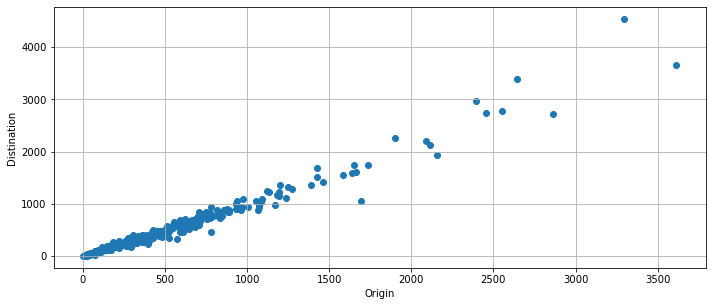

In [31]:
# create figure with approperiate size
plt.figure(figsize=[11.69,4.8])
# creat plot on the figure
plt.scatter(x_coordinates,y_coordinates)
# add grid
plt.grid()
# add labels
plt.xlabel('Origin')
plt.ylabel('Distination')

In [32]:
stations = pd.concat([x_coordinates,y_coordinates],axis=1)

In [33]:
stations.head()

,0,1
10th Ave at E 15th St,55,35
10th St at Fallon St,333,350
10th St at University Ave,180,267
11th St at Bryant St,777,935
11th St at Natoma St,775,824


In [34]:
stations.rename({0:'x_coordinates', 1:'y_coordinates'},axis = 1, inplace=True)

In [35]:
stations.head()

,x_coordinates,y_coordinates
10th Ave at E 15th St,55,35
10th St at Fallon St,333,350
10th St at University Ave,180,267
11th St at Bryant St,777,935
11th St at Natoma St,775,824


Text(0.5, 1.0, 'Heat map and correlation between origin stations and Distination ones')

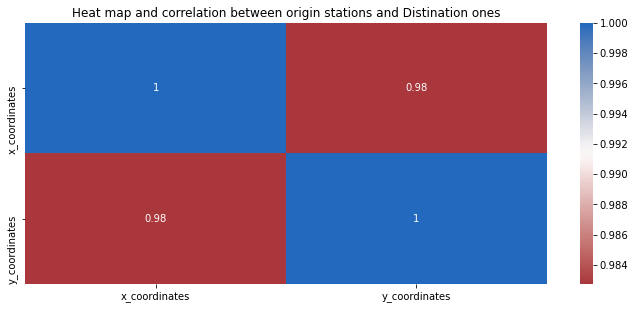

In [36]:
# create figure with size
plt.figure(figsize=[11.69,4.8])
# create a plot
sb.heatmap(stations.corr(),cmap='vlag_r', annot = True);
# set a title
plt.title('Heat map and correlation between origin stations and Distination ones')

The heat map above gives strong correlation between stations as origins and distainations. As an emphasize on the reading of the previous point plot figure.

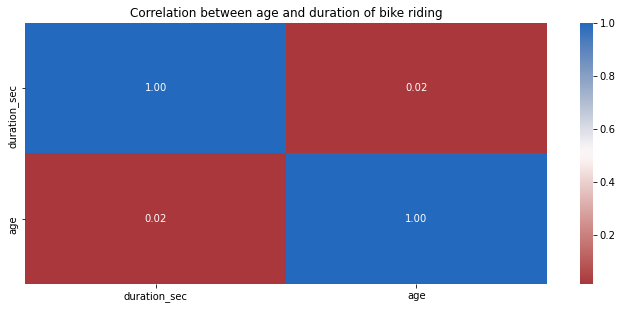

In [37]:
# create figure with size
plt.figure(figsize = [11.69, 4.8])
# plot
sb.heatmap(gobike[['duration_sec','age']].corr(), fmt = '.2f', annot=True, cmap = 'vlag_r')
# set a title
plt.title('Correlation between age and duration of bike riding');

There seems no correlation between age and suration of bike riding.

<AxesSubplot:xlabel='age', ylabel='member_gender'>

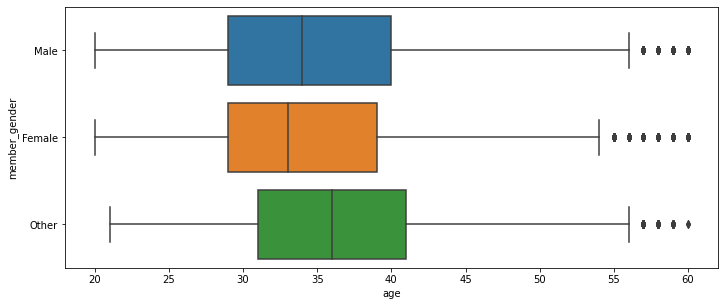

In [38]:
# set figure size
plt.figure(figsize = [11.69, 4.8]) 
# creat 2-d box plot
sb.boxplot(data = gobike, x = 'age', y = 'member_gender')

From the figure above it seems that most rideres are of the same age stage in average (approxiamtely 35 five years old for all genders). this can make the decision maker more specified in marketing.

C:\Users\Motaal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Most frequent day Rides taking place')

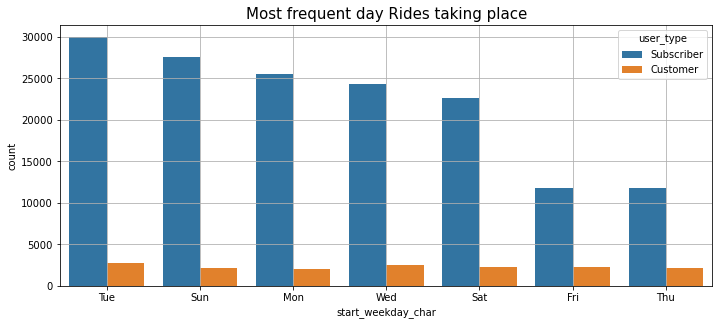

In [39]:
# set figure size
plt.figure(figsize=[11.69,4.8])
# creat a subplot
plt.subplot(1,1,1)
# sort columns
indx2=gobike['start_weekday_char'].value_counts().index
# create the plots
sb.countplot('start_weekday_char', data = gobike, hue='user_type',order=indx2 );
# add Grids
plt.grid()
plt.title('Most frequent day Rides taking place', fontsize=15)

C:\Users\Motaal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Most frequent day Rides taking place')

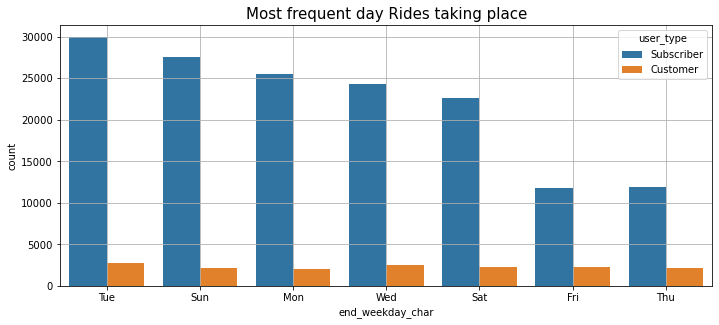

In [40]:
# set figure size
plt.figure(figsize=[11.69,4.8])
# creat a subplot
plt.subplot(1,1,1)
# sort columns
indx2=gobike['end_weekday_char'].value_counts().index
# create the plots
sb.countplot('end_weekday_char', data = gobike, hue='user_type',order=indx2 );
# add Grids
plt.grid()
plt.title('Most frequent day Rides taking place', fontsize=15)

As 2-d variables as shown in the above figures it's obvious that subscribers are taking the largest share of rides than the customer users. Also these figures shows that Tuseday (mid of the week) is the day of maximum demand on bikes riding. Whereas Thurusday and Friday are the least ones. An eye should be kept on the fact that all the observations and records lie into an only one month as explained in previous section which is February. Then by linking data to gether, most of working days there are no obvios evidence that working days are separtae from weekends statistically. This may affect the assumption that useres are using the bikes as a means of transportation since no clear difference between working days in the week and weekends.To judge this more fairly further data about other months through the year should be collected and compared. 

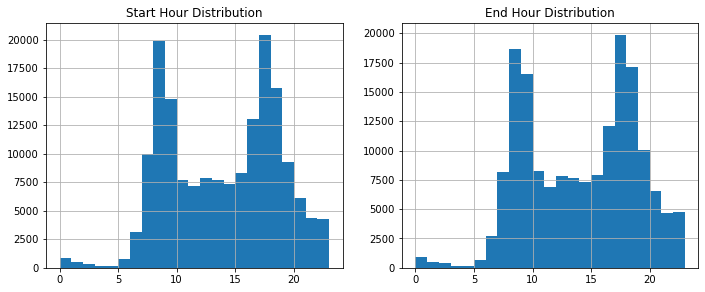

In [41]:
# add bin sizing
bins = range(0,24,1)
# creat subplot matrix
fig,ax =plt.subplots(nrows=1,ncols=2)
# assign axes to variable labels
ax1=ax[0]
ax2=ax[1]
# plot histograms
ax1.hist(data = gobike, x = 'start_hr', bins = bins);
ax2.hist(data = gobike, x = 'end_hr',   bins = bins);
# add grid to the plot 
ax1.grid();
ax2.grid();
# set titels
ax1.set_title('Start Hour Distribution')
ax2.set_title('End Hour Distribution')
# and finally set the Figure size
fig.set_size_inches( 11.69, 4.5)

In the later two figures the histograms give a hint about the existence of two peaks in the day for the starting and endings of the rides. This fact in reflected from the bimodal graphs above. in the starting hours, the two peaks are approximately at 8.0 A.M and 5:30 P.M. The numbers are similar when taking about the ending hours also. This may be read as side by side to the fact that the majority of durations are short ones to draw a picture of the whole situation. this can be read as if the users are using bikes as atransportation means to and from their distinations at the begining of the day and once more at the end of it.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The most interesing deduced note is that rideres are using bikes as a means of transportation for short period goes for most of the useres. Also, the stations has approximately the same number of rides dparting the station and recived bikes. this means side by side to the short duration of bike rides that they bike are used as means of transportation between nearby stations this is emphasized by the bimodal histogram of the starting hour of the rides and the ending hour of the rides. Thus, through three different variables (duration,starting and ending hour,starting and ending stations) this assumption has proven to be stong enough.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> From analysis it has been shown that stations are used aproximately mutally for short distances inbetween. This can be deduced from the sort rides durations and the frquency over each station.Also the bimodal distributions of the start hour and end hour of each ride is telling a similar story that emphasizes that the bikes are used as means of transportation.

## Multivariate Exploration


Text(0.5, 1.0, 'Other')

<Figure size 841.68x595.44 with 0 Axes>

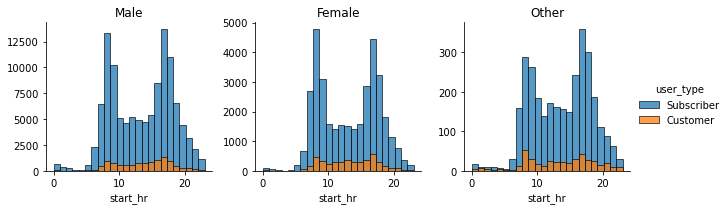

In [42]:
# set figure size
plt.figure(figsize=[ 11.69, 8.27]);
# FacetGrid the data
g=sb.FacetGrid(gobike, col='member_gender',sharey = False,hue='user_type');
# add vriables and disable the y -axis sharing and bins sizing
g.map_dataframe(sb.histplot,'start_hr',bins=24);
# add legend
g.add_legend();
# add titles
g.axes.flat[0].set_title('Male')
g.axes.flat[1].set_title('Female')
g.axes.flat[2].set_title('Other')


The above figures give describtion of satrting hour total number of useres for each gender type and user types are included on the same graph as well. From these figures one can notice that the number of subscriber male gender is much larger at the starting hour of the rides espcially when comparing at the points of rush hours(the two peaks in each graph). For example the number of male subscribers taking their bikes for a ride around 7-10 am is approximately 3 times the female subscribers. The same trend is true for the second rush hour (around 5 P.M). Whereas for the "Other" gender the numbers are much lesser. approximately one twintyfifith the male subscriber totals.


Text(0.5, 1.0, 'Other')

<Figure size 841.68x595.44 with 0 Axes>

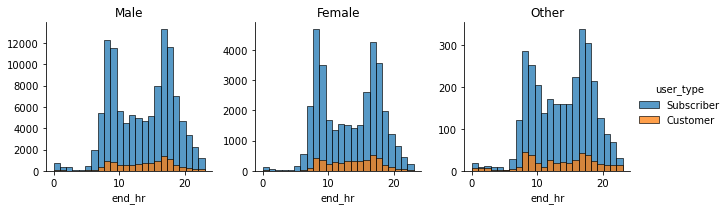

In [43]:
# set figure size
plt.figure(figsize=[ 11.69, 8.27]);
# FacetGrid the data
g=sb.FacetGrid(gobike, col='member_gender',sharey = False,hue='user_type');
# add vriables and disable the y -axis sharing and bins sizing
g.map_dataframe(sb.histplot,'end_hr',bins=24);
# add legend
g.add_legend();
# add titles
g.axes.flat[0].set_title('Male')
g.axes.flat[1].set_title('Female')
g.axes.flat[2].set_title('Other')


Similar trend to the total numbers of the starting hour histogram. Both of them share the profile of the bimodal and the two rush hours at the end of the ride. This fact is related to and can be correlated to the short-duration rides in general as noticed before.

Text(0.5, 1.0, 'Other')

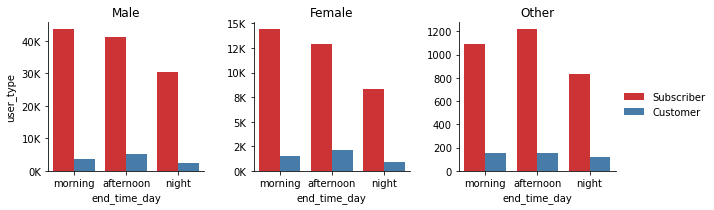

In [44]:
# so as to order the columns of the plot 
indx=gobike['end_time_day'].value_counts().index


# so as to enhance the y axis look, i.e to write the values in K's (1000)
def countplot(x, hue, **kwargs):
    sb.countplot(x='end_time_day', hue='user_type', palette='Set1', **kwargs)


g   = sb.FacetGrid(data=gobike,col='member_gender', sharey = False)
g.map_dataframe(countplot,'end_time_day','user_type',order=indx)

g.add_legend()

from matplotlib.ticker import FuncFormatter
for i, ax in enumerate(g.axes.flat):
    f = lambda x, pos: f'{x/10**3:,.0f}K'
    if i>1:
        continue
    else:
        ax.yaxis.set_major_formatter(FuncFormatter(f)) 

# add titles
g.axes.flat[0].set_title('Male')
g.axes.flat[1].set_title('Female')
g.axes.flat[2].set_title('Other')
# add titles
g.axes.flat[0].set_title('Male')
g.axes.flat[1].set_title('Female')
g.axes.flat[2].set_title('Other')


When specifically talking about male subscribers, the total riders number is much higher (more than 40 thousand users) than the female users (14 thousand) for the early hours of the day (morning period). A slight increase in customer type users is nonticed when talking female gender rather than male useres but again this goes true only for customer type users. Whereas in general other type gender has much lower portions.

Text(0.5, 1.0, 'Other')

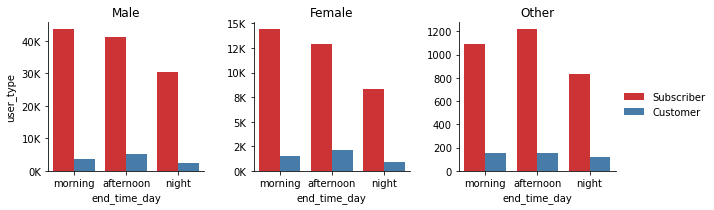

In [45]:
# so as to order the columns of the plot 
indx=gobike['end_time_day'].value_counts().index





# so as to enhance the y axis look, i.e to write the values in K's (1000)
def countplot(x, hue, **kwargs):
    sb.countplot(x='end_time_day', hue='user_type', palette='Set1', **kwargs)


g   = sb.FacetGrid(data=gobike,col='member_gender', sharey = False)
g.map_dataframe(countplot,'end_time_day','user_type',order=indx)

g.add_legend()

from matplotlib.ticker import FuncFormatter
for i, ax in enumerate(g.axes.flat):
    f = lambda x, pos: f'{x/10**3:,.0f}K'
    if i>1:
        continue
    else:
        ax.yaxis.set_major_formatter(FuncFormatter(f)) 

# add titles
g.axes.flat[0].set_title('Male')
g.axes.flat[1].set_title('Female')
g.axes.flat[2].set_title('Other')

The same trend is repeted and noticed again when talking about the end period of the rides of the day. Again the similarty returns to the fact of the short durations intotal period in miutes of the rides.

(0.0, 80.0)

<Figure size 841.68x576 with 0 Axes>

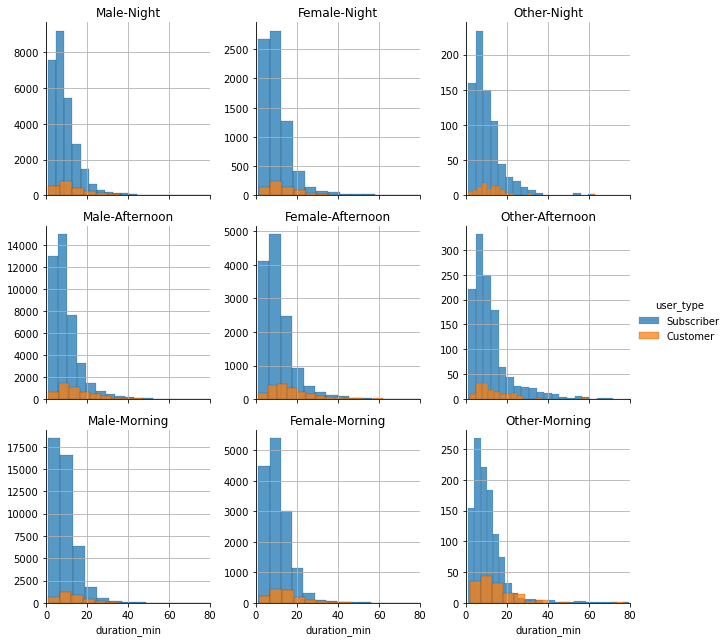

In [46]:
# set the figure size
plt.figure(figsize=[11.69,8]);

# creat a Facet Grid from seaborn lib
g=sb.FacetGrid(gobike,row='start_time_day',  col='member_gender',sharey = False,hue='user_type');

# specify variables and bins
g.map_dataframe(sb.histplot,'duration_min', bins =100);

# add legend to the graph
g.add_legend();




# write a function to prperly locate the titles
def sr(i,j):
    if j == 0:
        gender='Male'
    if j == 1:
        gender='Female'
    if j ==2:
        gender ='Other'
    if i == 0:
        time='Night'
    if i ==1:
        time='Afternoon'
    if i == 2:
        time ='Morning'
    ititle='{}-{}'.format(gender,time)
    return ititle
    
# loop to write titles for the matrix
title=[]
for i in range(0,3):
    for j in range(0,3):
        title.append(sr(i,j))
 
    
    
    
# loop to set titles and grids  
for i, ax in enumerate(g.axes.flat):
    ax.grid()
    ax.set_title(title[i])

plt.xlim(0,80)

It's noticed again that for the smae short durations in minutes the number of male subscribers taht are taking their rides for similar short durations, is approximately four times the number of female riders in the morning period of the day. This ratio decreses slightly during the afternoon period and returns again in the night same initial value. "Other" gender users are of much lesser rartios.


(0.0, 80.0)

<Figure size 841.68x576 with 0 Axes>

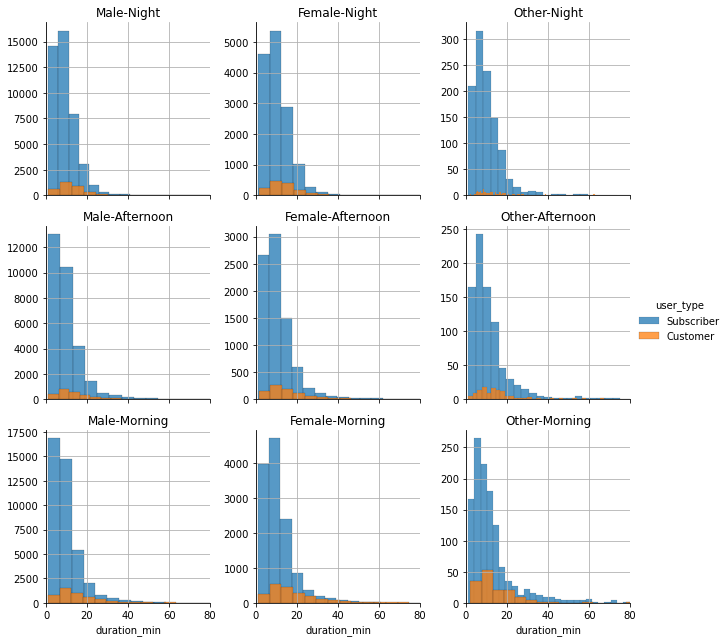

In [47]:
# set the figure size
plt.figure(figsize=[11.69,8]);

# creat a Facet Grid from seaborn lib
g=sb.FacetGrid(gobike,row='end_time_day',  col='member_gender',sharey = False,hue='user_type');

# specify variables and bins
g.map_dataframe(sb.histplot,'duration_min', bins =100);

# add legend to the graph
g.add_legend();




# write a function to prperly locate the titles
def sr(i,j):
    if j == 0:
        gender='Male'
    if j == 1:
        gender='Female'
    if j ==2:
        gender ='Other'
    if i == 0:
        time='Night'
    if i ==1:
        time='Afternoon'
    if i == 2:
        time ='Morning'
    ititle='{}-{}'.format(gender,time)
    return ititle
    
# loop to write titles for the matrix
title=[]
for i in range(0,3):
    for j in range(0,3):
        title.append(sr(i,j))
 
    
    
    
# loop to set titles and grids  
for i, ax in enumerate(g.axes.flat):
    ax.grid()
    ax.set_title(title[i])

plt.xlim(0,80)

Similar trend appears again for the short durations of bike riding for male femal and other types of gender at the end of the rides.

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

In [48]:
# export the cured data to a new csv file

# gobike.to_csv(r'C:\Users\Motaal\Desktop\PYTHON\ingpd\NewCleanedDataset.csv',encoding= 'cp1252')